Let's begin by loading the `plotnine` module; call it `p9` for convenience.

In [0]:
import plotnine as p9

We'll also need `pandas` (call it `pd`):

In [0]:
import pandas as pd

We'll want to connect to the shared Google Drive to get access to our data. Remember, this is always done the same way:

In [3]:
# mount google drive 
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Now load the LABEVENTS.csv and PATIENTS.csv data from MIMIC:

In [0]:
labevents = pd.read_csv("/content/gdrive/My Drive/[YCMI_CBDS Summer Course] Data/mimic_iii/LABEVENTS.csv")
patients = pd.read_csv("/content/gdrive/My Drive/[YCMI_CBDS Summer Course] Data/mimic_iii/PATIENTS.csv")

Take a look at both datasets to get a sense of how it is structured:

In [5]:
labevents

,row_id,subject_id,hadm_id,itemid,charttime,value,valuenum,valueuom,flag
0,6244563,10006,NaN,50868,2164-09-24 20:21:00,19,19.00,mEq/L,NaN
1,6244564,10006,NaN,50882,2164-09-24 20:21:00,27,27.00,mEq/L,NaN
2,6244565,10006,NaN,50893,2164-09-24 20:21:00,10.0,10.00,mg/dL,NaN
3,6244566,10006,NaN,50902,2164-09-24 20:21:00,97,97.00,mEq/L,NaN
4,6244567,10006,NaN,50912,2164-09-24 20:21:00,7.0,7.00,mg/dL,abnormal
...,...,...,...,...,...,...,...,...,...
76069,20452679,44228,103379.0,51250,2170-12-24 04:09:00,88,88.00,fL,NaN
76070,20452680,44228,103379.0,51265,2170-12-24 04:09:00,595,595.00,K/uL,abnormal
76071,20452681,44228,103379.0,51277,2170-12-24 04:09:00,14.5,14.50,%,NaN
76072,20452682,44228,103379.0,51279,2170-12-24 04:09:00,2.76,2.76,m/uL,abnormal


In [6]:
patients

,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag
0,9467,10006,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1
1,9472,10011,F,2090-06-05 00:00:00,2126-08-28 00:00:00,2126-08-28 00:00:00,NaN,1
2,9474,10013,F,2038-09-03 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,1
3,9478,10017,F,2075-09-21 00:00:00,2152-09-12 00:00:00,NaN,2152-09-12 00:00:00,1
4,9479,10019,M,2114-06-20 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,1
...,...,...,...,...,...,...,...,...
95,31838,44083,M,2057-11-15 00:00:00,2114-02-20 00:00:00,2114-02-20 00:00:00,2114-02-20 00:00:00,1
96,31853,44154,M,1878-05-14 00:00:00,2178-05-15 00:00:00,2178-05-15 00:00:00,2178-05-15 00:00:00,1
97,31867,44212,F,2078-06-16 00:00:00,2124-01-29 00:00:00,NaN,2124-01-29 00:00:00,1
98,31870,44222,M,2107-06-27 00:00:00,2182-08-03 00:00:00,2182-08-03 00:00:00,NaN,1


In the `labevents` dataframe, the `charttime` column represents date and time. Use `pd.to_datetime` to tell the computer this:

In [0]:
labevents['charttime'] = pd.to_datetime(labevents['charttime'])

### Bar chart

Let's start simply: Make a bar chart showing the `gender` data from `patients`. You should end up with two bars: one for `M` one for `F`. Which gender is more common in our dataset?

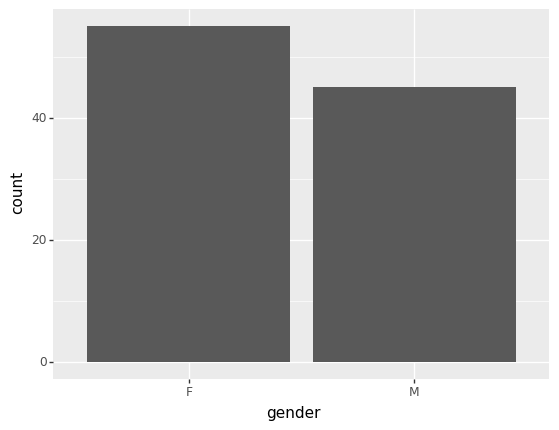

<ggplot: (-9223363270661014910)>

In [9]:
p9.ggplot(patients) + p9.geom_bar(p9.aes(x="gender"))

### Time series

Select blood potassium concentration in mEq/L (`itemid == 50971`) for patient `40310`.


In [0]:
potassium = labevents[(labevents['itemid']==50971) & (labevents['subject_id']==40310)]

Make a line graph of the measurements (`valuenum`) vs date (`charttime`). Note that ggplot automatically handles timestamps; we do not need to do anything special for dates.

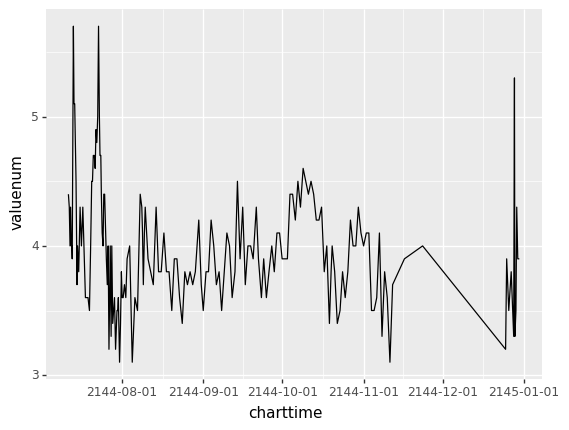

<ggplot: (-9223363270662287784)>

In [11]:
p9.ggplot(potassium) + p9.geom_line(p9.aes(x="charttime",y="valuenum",group="subject_id"))

Did you give your graph meaningful x- and y-axis labels? If not, redo it but with labels "Date" for the x-axis and "[K] (mEq/L)" for the y-axis (you'll want to use `p9.labs`).

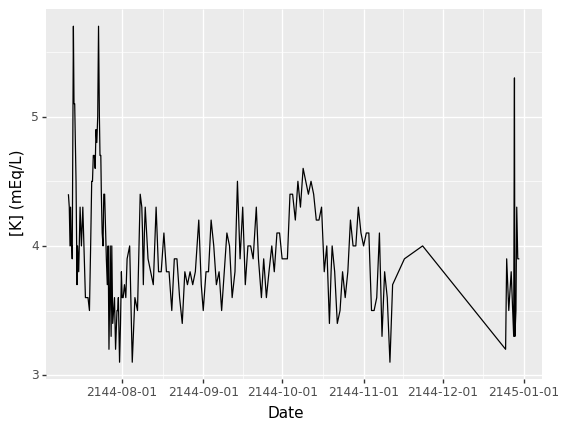

<ggplot: (8766192501217)>

In [12]:
p9.ggplot(potassium) + p9.geom_line(p9.aes(x="charttime",y="valuenum",group="subject_id")) + p9.labs(x="Date",y="[K] (mEq/L)")

How do you interpret the graph between mid-November and late December? Are there any time periods that stand out as not being like the rest?

**It looks relatively smooth there, but that's only because there aren't any data points in between.**

### Box plot

So far we've seen how one particular person's blood potassium concentration changed over time.

Let's instead try to get a sense of the variability of blood sodium concentrations (`labevents['itemid'] == 50983`) within individuals but also how individuals compare. To do this, we'll use a boxplot (`geom_boxplot`). Specifically, make a boxplot that `group`s by `subject_id`, plots the concentrations (`valuenum`) along the y-axis, and positions the box across the x-axis beased on `subject_id`. To keep the graph readable, only include data for `subject_id < 20000`. Store the selected data in the variable `sodium` as we'll need it later.

In [0]:
sodium = labevents[(labevents['itemid'] == 50983) & (labevents['subject_id'] < 20000)]

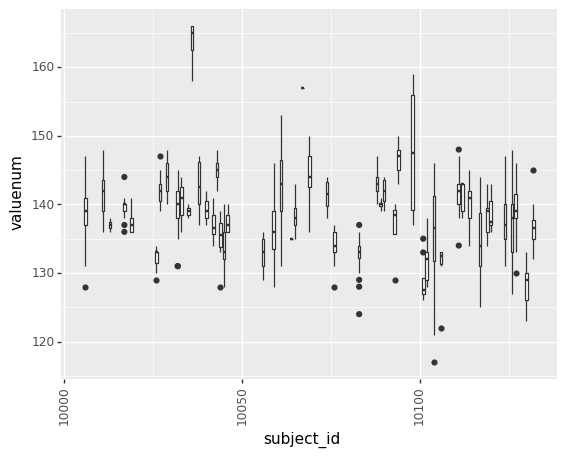

<ggplot: (-9223363270662255086)>

In [14]:
p9.ggplot(sodium, p9.aes(x="subject_id", y="valuenum", group='subject_id')) + p9.geom_boxplot() + p9.theme(axis_text_x=p9.element_text(angle=90))

Is our visualization telling the right story?

Does the x-axis location mean anything? The `subject_id` only exists to distinguish unique patients; its numeric value has no meaning.

To get a better picture: make a new variable `sodium2` based on `sodium` (set it equal to `pd.DataFrame(sodium)`), then set the `subject_id` column to represent categorical values (`astype('category')`). Now regraph.

How does your graph compare to the previous one?

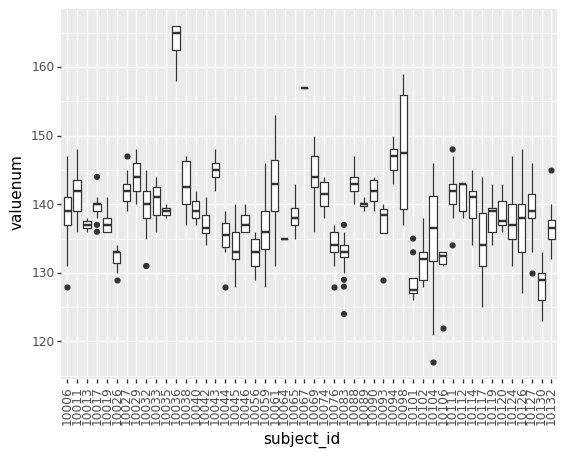

<ggplot: (-9223363270665366661)>

In [15]:
sodium2 = pd.DataFrame(sodium)
sodium2['subject_id'] = sodium2['subject_id'].astype('category')
p9.ggplot(sodium2, p9.aes(x="subject_id", y="valuenum")) + p9.geom_boxplot() + p9.theme(axis_text_x=p9.element_text(angle=90))

Did you see any patients whose blood sodium levels seem unusual relative to the rest? (e.g. unusually high, unusually low, or unusually variable).

- high mean: 10036, 10067
- high variability: 10098, 100104


### Scatter plot

Let's load the population data from the Pima Indian diabetes dataset:




In [0]:
diabetes = pd.read_csv('/content/gdrive/My Drive/[YCMI_CBDS Summer Course] Data/diabetes.csv')

As always, start by looking at the data to get a sense of what it contains:

In [17]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Make a scatter plot showing the relationship of `Glucose` and `Insulin` in the `diabetes` data.


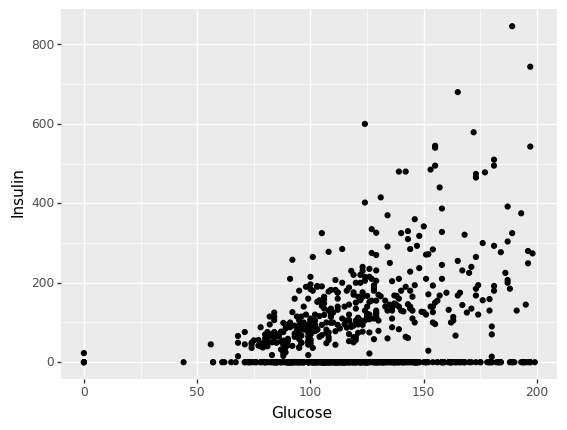

<ggplot: (8766189557701)>

In [18]:
p9.ggplot(diabetes,p9.aes(x="Glucose",y="Insulin")) + p9.geom_point()

You can see that there are a lot of times where insulin has a zero value. Let's filter those out and continue.

In [0]:
diabetes_insulin = diabetes[diabetes['Insulin']!=0]

There are so many points, it's hard to see where the most likely values are in the basic scatter plot. To get a better sense, add a `p9.geom_density_2d` to overlay a contour map of the point density. Specify a `color` so that it stands out:

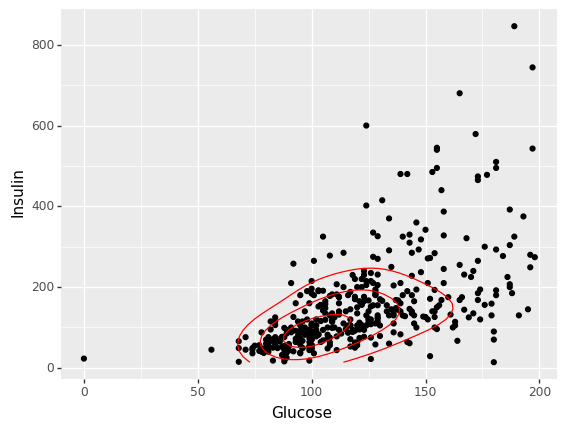

<ggplot: (8766192501182)>

In [20]:
p9.ggplot(diabetes_insulin,p9.aes(x="Glucose",y="Insulin")) + p9.geom_point() + p9.geom_density_2d(color='red')

Finally, let's add a smoothed curve `p9.geom_smooth` showing the overall trend. Again, specify a color so that you can see the trend curve:

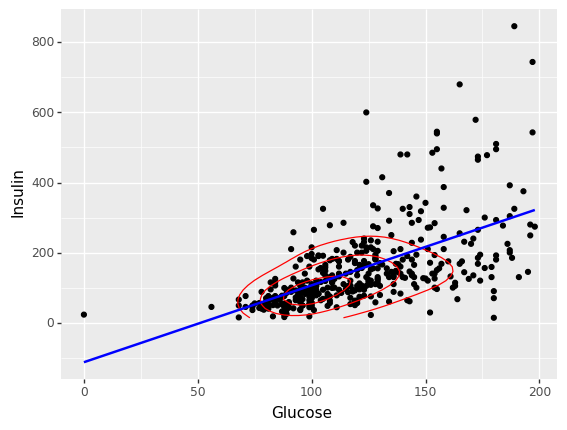

<ggplot: (8766189183415)>

In [21]:
p9.ggplot(diabetes_insulin,p9.aes(x="Glucose",y="Insulin")) + p9.geom_point() + p9.geom_density_2d(color='red') + p9.geom_smooth(method='lm',color='blue',se=False)